In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="debee8d1a1092fd0ca4570863e6c2100eaa113bc"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\mohan\AppData\Roaming\Python\Python310\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-04 00:00:00+00:00,191.83,193.42,191.35,191.64,26266174,45.827936,46.207785,45.713265,45.782545,105064696,0.0,1.0
1,AAPL,2018-06-05 00:00:00+00:00,193.31,193.94,192.36,193.07,21565963,46.181506,46.332012,45.954552,46.124171,86263852,0.0,1.0
2,AAPL,2018-06-06 00:00:00+00:00,193.98,194.08,191.92,193.63,20933619,46.341568,46.365458,45.849437,46.257954,83734476,0.0,1.0
3,AAPL,2018-06-07 00:00:00+00:00,193.46,194.20,192.34,194.14,21347180,46.217341,46.394126,45.949775,46.379792,85388720,0.0,1.0
4,AAPL,2018-06-08 00:00:00+00:00,191.70,192.00,189.77,191.17,26656799,45.796879,45.868549,45.335805,45.670263,106627196,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-05-25 00:00:00+00:00,172.99,173.895,171.6900,172.410,56058258,172.99,173.895,171.6900,172.410,56058258,0.0,1.0
1254,AAPL,2023-05-26 00:00:00+00:00,175.43,175.770,173.1100,173.320,54834975,175.43,175.770,173.1100,173.320,54834975,0.0,1.0
1255,AAPL,2023-05-30 00:00:00+00:00,177.30,178.990,176.5700,176.960,55964401,177.30,178.990,176.5700,176.960,55964401,0.0,1.0
1256,AAPL,2023-05-31 00:00:00+00:00,177.25,179.350,176.7600,177.325,99313268,177.25,179.350,176.7600,177.325,99313268,0.0,1.0
1257,AAPL,2023-06-01 00:00:00+00:00,180.09,180.120,176.9306,177.700,68901809,180.09,180.120,176.9306,177.700,68901809,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       191.83
1       193.31
2       193.98
3       193.46
4       191.70
         ...  
1253    172.99
1254    175.43
1255    177.30
1256    177.25
1257    180.09
Name: close, Length: 1258, dtype: float64

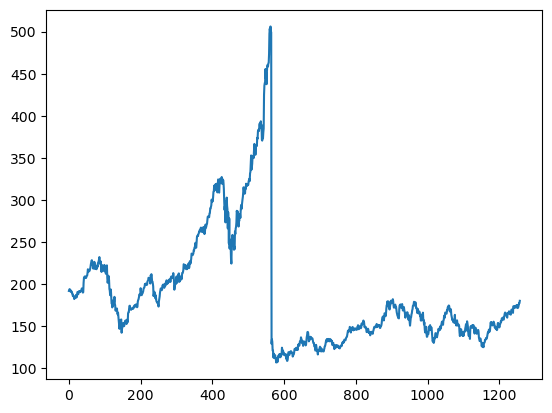

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.21287414]
 [0.21658109]
 [0.21825924]
 ...
 [0.1764809 ]
 [0.17635567]
 [0.183469  ]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:

training_size,test_size

(1006, 252)

In [18]:
train_data

array([[0.21287414],
       [0.21658109],
       [0.21825924],
       ...,
       [0.09252348],
       [0.107201  ],
       [0.10519724]])

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(905, 100)
(905,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(151, 100)
(151,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 20s 561ms/step - loss: 0.0288 - val_loss: 5.2533e-04
Epoch 2/100
15/15 [==============================] - 6s 380ms/step - loss: 0.0096 - val_loss: 7.4617e-04
Epoch 3/100
15/15 [==============================] - 6s 404ms/step - loss: 0.0073 - val_loss: 2.9314e-04
Epoch 4/100
15/15 [==============================] - 6s 374ms/step - loss: 0.0068 - val_loss: 9.6036e-04
Epoch 5/100
15/15 [==============================] - 5s 301ms/step - loss: 0.0060 - val_loss: 3.5100e-04
Epoch 6/100
15/15 [==============================] - 5s 309ms/step - loss: 0.0044 - val_loss: 2.0903e-04
Epoch 7/100
15/15 [==============================] - 5s 336ms/step - loss: 0.0042 - val_loss: 7.7385e-04
Epoch 8/100
15/15 [==============================] - 5s 328ms/step - loss: 0.0037 - val_loss: 2.1655e-04
Epoch 9/100
15/15 [==============================] - 6s 412ms/step - loss: 0.0031 - val_loss: 4.0789e-04
Epoch 10/100
15/15 [==============================] - 

15/15 [==============================] - 5s 351ms/step - loss: 0.0027 - val_loss: 1.8140e-04
Epoch 79/100
15/15 [==============================] - 5s 318ms/step - loss: 0.0019 - val_loss: 1.6297e-04
Epoch 80/100
15/15 [==============================] - 5s 334ms/step - loss: 0.0017 - val_loss: 1.3635e-04
Epoch 81/100
15/15 [==============================] - 5s 351ms/step - loss: 0.0016 - val_loss: 2.9571e-04
Epoch 82/100
15/15 [==============================] - 5s 324ms/step - loss: 0.0013 - val_loss: 1.3569e-04
Epoch 83/100
15/15 [==============================] - 5s 321ms/step - loss: 0.0012 - val_loss: 2.2828e-04
Epoch 84/100
15/15 [==============================] - 5s 312ms/step - loss: 9.6223e-04 - val_loss: 1.3005e-04
Epoch 85/100
15/15 [==============================] - 5s 313ms/step - loss: 0.0011 - val_loss: 1.2779e-04
Epoch 86/100
15/15 [==============================] - 5s 330ms/step - loss: 0.0011 - val_loss: 1.7788e-04
Epoch 87/100
15/15 [==============================] - 5

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(ytest, test_predict))

# calculate accuracy percentage
max_val = scaler.inverse_transform([[1]])[0,0]
min_val = scaler.inverse_transform([[0]])[0,0]
train_accuracy = 100 - train_rmse * 100 / (max_val - min_val)
test_accuracy = 100 - test_rmse * 100 / (max_val - min_val)

# print results
print(f"Train RMSE: {train_rmse:.2f}, Train Accuracy: {train_accuracy:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}, Test Accuracy: {test_accuracy:.2f}%")


In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:

len(test_data)

In [ ]:
x_input=test_data[152:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1157:])


In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)